In [36]:
#import the necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import missingno as mn
import plotly.express as ps
import plotly.graph_objects as go

In [37]:
#load the data
data=pd.read_csv("/content/Tamilnadu agriculture yield data.csv")
data.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Tamil Nadu,ARIYALUR,2008,Kharif,Rice,24574,NaN
1,Tamil Nadu,ARIYALUR,2008,Whole Year,Arhar/Tur,209,NaN
2,Tamil Nadu,ARIYALUR,2008,Whole Year,Bajra,565,NaN
3,Tamil Nadu,ARIYALUR,2008,Whole Year,Banana,190,NaN
4,Tamil Nadu,ARIYALUR,2008,Whole Year,Cashewnut,31113,NaN


In [38]:
#dimensions of data
data.shape

(13547, 7)

In [39]:
#dataframe info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13547 entries, 0 to 13546
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State_Name     13547 non-null  object 
 1   District_Name  13547 non-null  object 
 2   Crop_Year      13547 non-null  int64  
 3   Season         13547 non-null  object 
 4   Crop           13547 non-null  object 
 5   Area           13547 non-null  int64  
 6   Production     13266 non-null  float64
dtypes: float64(1), int64(2), object(4)
memory usage: 741.0+ KB


In [40]:
#checking for null values in initial dataset
print(data.isna().sum())

State_Name         0
District_Name      0
Crop_Year          0
Season             0
Crop               0
Area               0
Production       281
dtype: int64


In [41]:
#handle null values by filling it
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='median')
data["Production"]=imputer.fit_transform(data[["Production"]])
data.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Tamil Nadu,ARIYALUR,2008,Kharif,Rice,24574,841.0
1,Tamil Nadu,ARIYALUR,2008,Whole Year,Arhar/Tur,209,841.0
2,Tamil Nadu,ARIYALUR,2008,Whole Year,Bajra,565,841.0
3,Tamil Nadu,ARIYALUR,2008,Whole Year,Banana,190,841.0
4,Tamil Nadu,ARIYALUR,2008,Whole Year,Cashewnut,31113,841.0


<ipython-input-45-6d0a4edf6475>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




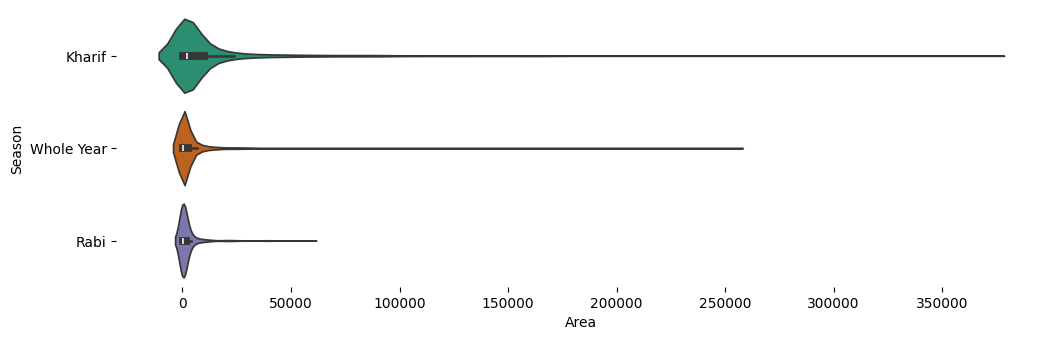

In [45]:
# @title Season vs Area

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['Season'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='Area', y='Season', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

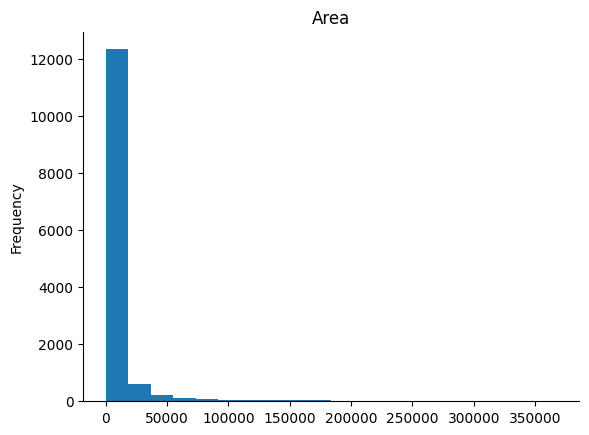

In [42]:
# @title Area

from matplotlib import pyplot as plt
data['Area'].plot(kind='hist', bins=20, title='Area')
plt.gca().spines[['top', 'right',]].set_visible(False)

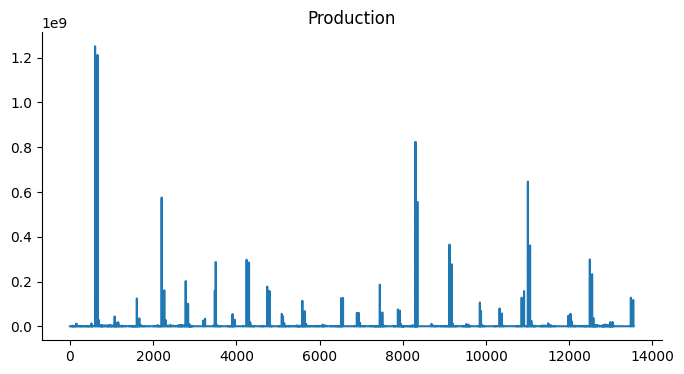

In [43]:
# @title Production

from matplotlib import pyplot as plt
data['Production'].plot(kind='line', figsize=(8, 4), title='Production')
plt.gca().spines[['top', 'right']].set_visible(False)

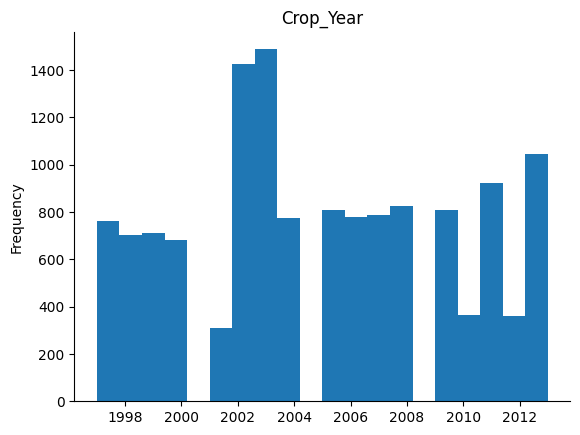

In [44]:
# @title Crop_Year

from matplotlib import pyplot as plt
data['Crop_Year'].plot(kind='hist', bins=20, title='Crop_Year')
plt.gca().spines[['top', 'right',]].set_visible(False)

<ipython-input-27-47220bbc6b9f>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




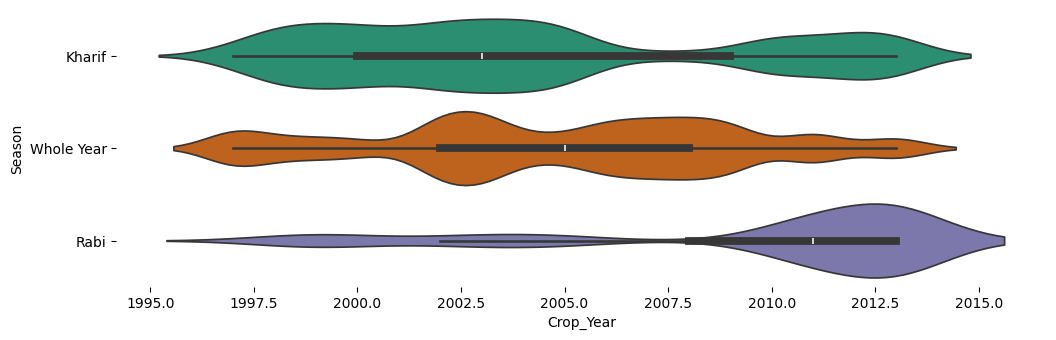

In [ ]:
# @title Season vs Crop_Year

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['Season'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='Crop_Year', y='Season', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

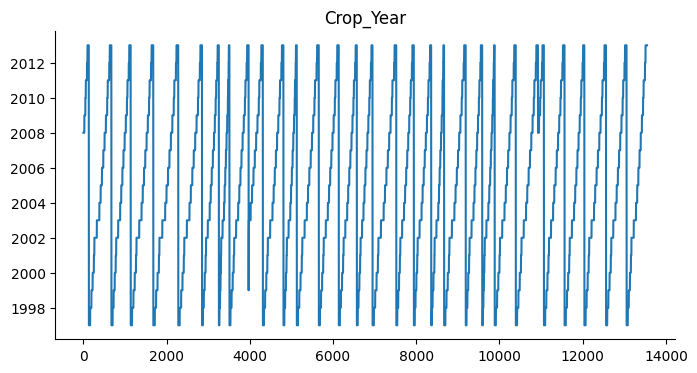

In [ ]:
# @title Crop_Year

from matplotlib import pyplot as plt
data['Crop_Year'].plot(kind='line', figsize=(8, 4), title='Crop_Year')
plt.gca().spines[['top', 'right']].set_visible(False)

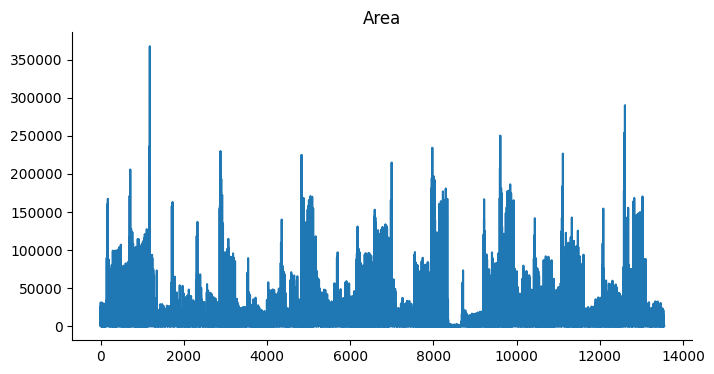

In [ ]:
# @title Area

from matplotlib import pyplot as plt
data['Area'].plot(kind='line', figsize=(8, 4), title='Area')
plt.gca().spines[['top', 'right']].set_visible(False)

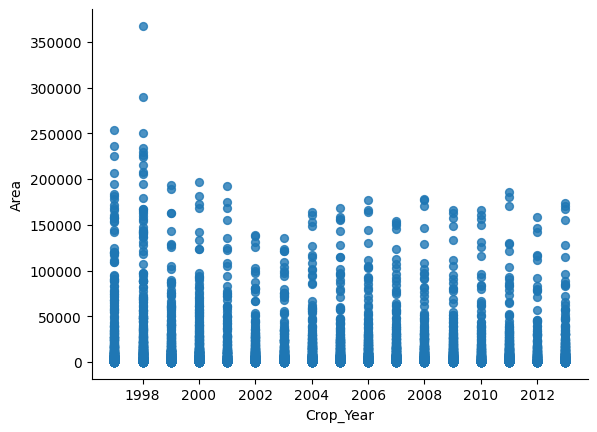

In [ ]:
# @title Crop_Year vs Area

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='Crop_Year', y='Area', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

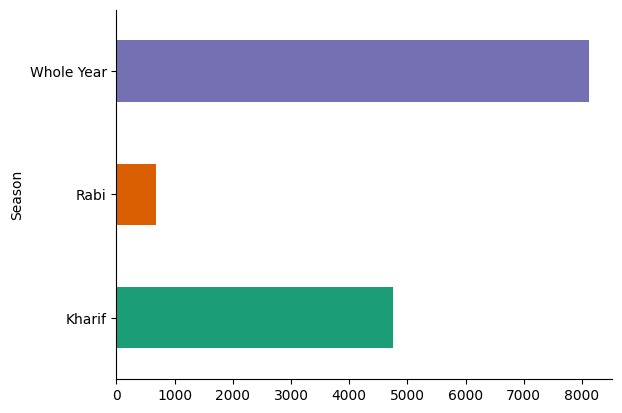

In [ ]:
# @title Season

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('Season').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)